In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

In [44]:
data=pd.read_csv("Travel.csv")

In [45]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [46]:
data.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [48]:
X = data[['MonthlyIncome']]
y = data['PitchSatisfactionScore']



In [49]:
X.isnull().sum()

MonthlyIncome    233
dtype: int64

In [50]:
y.isnull().sum()


np.int64(0)

In [51]:
# Handle missing values
X = X.fillna(X.mean())

In [52]:
X.isnull().sum()

MonthlyIncome    0
dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
### Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((3910, 1), (978, 1))

In [54]:
from sklearn.tree import DecisionTreeClassifier
treeclassifier=DecisionTreeClassifier()

In [55]:
treeclassifier.fit(X_train,y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

[Text(0.8299439587505738, 0.9928571428571429, 'x[0] <= 16164.5\ngini = 0.784\nsamples = 3910\nvalue = [771, 471, 1167, 726, 775]'),
 Text(0.7845597054195944, 0.9785714285714285, 'x[0] <= 16030.0\ngini = 0.37\nsamples = 9\nvalue = [0, 1, 1, 0, 7]'),
 Text(0.8072518320850841, 0.9857142857142858, 'True  '),
 Text(0.7837612162672297, 0.9642857142857143, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 0, 0, 4]'),
 Text(0.7853581945719591, 0.9642857142857143, 'x[0] <= 16051.5\ngini = 0.56\nsamples = 5\nvalue = [0, 1, 1, 0, 3]'),
 Text(0.7845597054195944, 0.95, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0]'),
 Text(0.7861566837243239, 0.95, 'x[0] <= 16104.5\ngini = 0.375\nsamples = 4\nvalue = [0, 0, 1, 0, 3]'),
 Text(0.7853581945719591, 0.9357142857142857, 'x[0] <= 16071.5\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 1, 0, 1]'),
 Text(0.7845597054195944, 0.9214285714285714, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1]'),
 Text(0.7861566837243239, 0.9214285714285714, 'gini = 0.0\nsamples = 1\nva

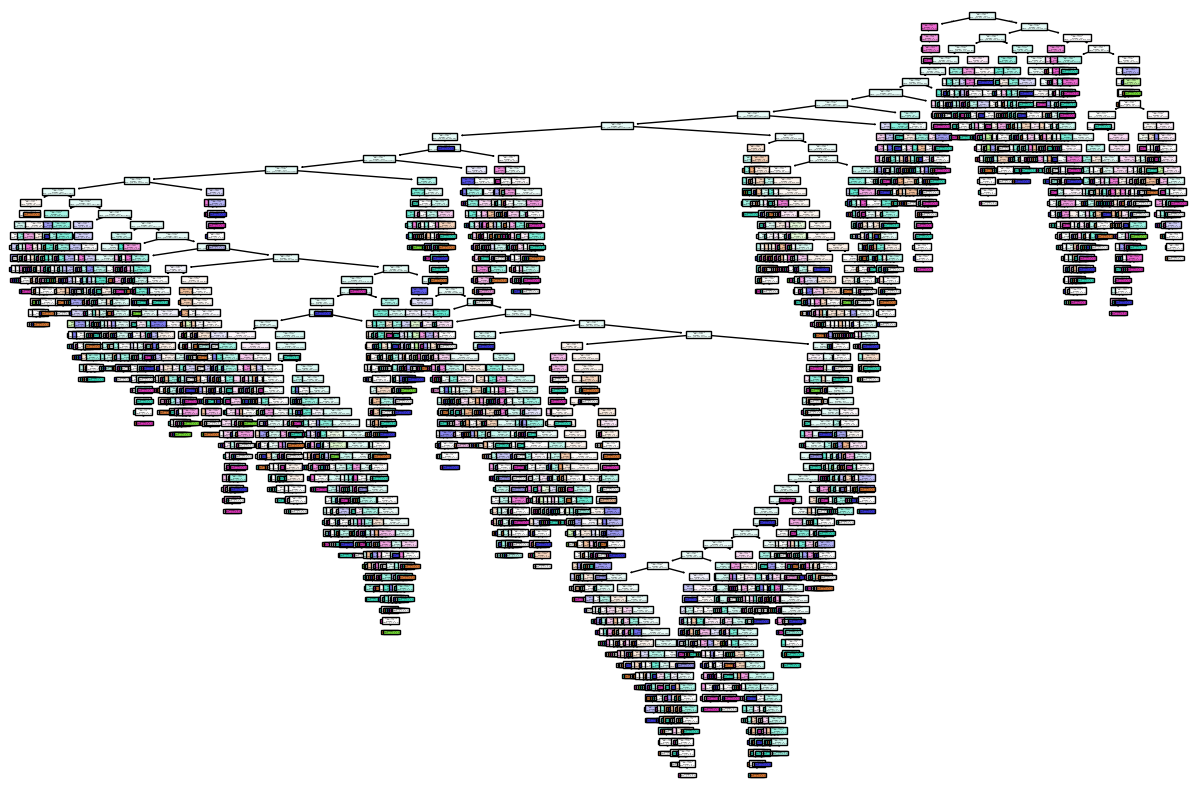

In [56]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

In [57]:
### Model Predictions
y_pred = treeclassifier.predict(X_test)
y_pred[:10]

array([1, 5, 5, 3, 1, 5, 1, 1, 3, 4])

### Model Evaluations

In [58]:
### Accuracy
accuracy_score(y_test, y_pred)


0.4652351738241309

In [59]:
### Classification Report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           1       0.12      0.15      0.13       171\n           2       0.02      0.02      0.02       115\n           3       0.62      0.64      0.63       311\n           4       0.68      0.59      0.63       186\n           5       0.62      0.61      0.61       195\n\n    accuracy                           0.47       978\n   macro avg       0.41      0.40      0.41       978\nweighted avg       0.47      0.47      0.47       978\n'

In [60]:
### Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[ 26,  73,  37,  13,  22],
       [ 92,   2,  12,   3,   6],
       [ 54,   1, 198,  29,  29],
       [ 24,   2,  34, 110,  16],
       [ 28,   5,  36,   7, 119]])

In [61]:
### Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
treeclassifier=DecisionTreeClassifier()

In [62]:
treemodel=DecisionTreeClassifier()

In [63]:
### Visualize the Decision Tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<Figure size 1500x1000 with 0 Axes>

### Prepruning And Hyperparameter Tuning

In [ ]:
param={
    'criterion':['gini','entropy', 'log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [ ]:
param

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
treemodel=DecisionTreeClassifier()

In [ ]:
grid=GridSearchCV(treeclassifier,param_grid=param,cv=5,scoring='accuracy')

In [ ]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_params_

In [ ]:
y_pred

array([1, 5, 5, 3, 1, 5, 1, 1, 3, 4, 4, 5, 3, 5, 1, 3, 1, 1, 2, 3, 3, 1,
       3, 3, 2, 3, 2, 4, 3, 1, 4, 4, 3, 3, 3, 5, 5, 3, 1, 3, 1, 1, 2, 3,
       5, 4, 4, 3, 3, 3, 5, 2, 1, 5, 3, 1, 1, 5, 3, 5, 1, 2, 3, 1, 1, 5,
       1, 3, 3, 4, 5, 2, 1, 3, 4, 1, 3, 5, 1, 1, 4, 4, 1, 5, 3, 3, 4, 1,
       5, 1, 5, 3, 5, 3, 1, 3, 1, 4, 1, 1, 4, 5, 5, 3, 1, 3, 5, 1, 3, 1,
       1, 3, 3, 2, 3, 4, 1, 4, 1, 3, 1, 1, 3, 5, 1, 1, 3, 5, 3, 3, 5, 4,
       3, 5, 2, 3, 2, 1, 1, 3, 5, 2, 5, 4, 3, 2, 4, 3, 5, 1, 4, 3, 4, 5,
       3, 3, 5, 3, 3, 4, 1, 3, 3, 4, 3, 3, 1, 3, 1, 4, 4, 3, 2, 5, 3, 5,
       5, 1, 1, 4, 5, 4, 4, 3, 5, 4, 5, 3, 4, 1, 3, 1, 3, 4, 4, 1, 3, 5,
       5, 1, 1, 5, 2, 3, 5, 5, 3, 1, 3, 4, 2, 5, 3, 5, 4, 3, 3, 1, 5, 3,
       5, 3, 1, 3, 5, 1, 3, 5, 4, 3, 3, 1, 5, 4, 4, 4, 4, 3, 1, 3, 5, 3,
       1, 3, 1, 4, 1, 2, 3, 3, 1, 4, 3, 2, 3, 3, 4, 1, 3, 1, 4, 2, 3, 2,
       4, 1, 2, 3, 2, 3, 5, 1, 3, 3, 3, 5, 4, 3, 4, 1, 3, 4, 5, 1, 5, 3,
       2, 4, 4, 5, 1, 3, 3, 4, 3, 4, 4, 5, 4, 5, 5,

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[ 26  73  37  13  22]
 [ 92   2  12   3   6]
 [ 54   1 198  29  29]
 [ 24   2  34 110  16]
 [ 28   5  36   7 119]]
              precision    recall  f1-score   support

           1       0.12      0.15      0.13       171
           2       0.02      0.02      0.02       115
           3       0.62      0.64      0.63       311
           4       0.68      0.59      0.63       186
           5       0.62      0.61      0.61       195

    accuracy                           0.47       978
   macro avg       0.41      0.40      0.41       978
weighted avg       0.47      0.47      0.47       978



In [ ]:
score=accuracy_score(y_test,y_pred)

In [ ]:
score

0.8666666666666667

In [ ]:
parm